In [31]:
%matplotlib notebook 

import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#compute shortest lenght across runs
def min_length(path, folder_name, parameter, n_runs, algorithm):

    lengths = []

    for run in range(n_runs):

        subfolder_name = 'res_{}_{}_{}'.format(algorithm, parameter, run+1)

        with open(os.path.join(path, folder_name, subfolder_name, 'results.json')) as f:

            data = json.load(f)

        f.close()

        lengths.append(len(data['avg_loss']))

    return min(lengths)

def averaged_res(path, folder_name, parameter, n_runs, min_length, algorithm):

    for run in range(n_runs):

        subfolder_name = 'res_{}_{}_{}'.format(algorithm, parameter, run+1)

        with open(os.path.join(path, folder_name, subfolder_name, 'results.json')) as f:

            data = json.load(f)

        f.close()

        if run+1 == 1:
            
            loss = np.asarray(data['avg_loss'])[:min_length]
            
            try:
                test = np.asarray(data['test_loss'])[:min_length]
            except:
                test = np.asarray(data['test_acc'])[:min_length]
            
            tot_time = np.asarray(data['tot_time'])

        else:

            loss += np.asarray(data['avg_loss'])[:min_length]
            
            try:
                test += np.asarray(data['test_loss'])[:min_length]
            except:
                test += np.asarray(data['test_acc'])[:min_length]
           
            tot_time += np.asarray(data['tot_time'])

    return loss/n_runs, tot_time/n_runs, test/n_runs


In [48]:
#define parameters
data = 'cifar10'
path = '../results'
n_runs = 5
lr_s = [0.1, 0.01, 0.001]
cg_iterations = [ 10, 5, 3, 2]#[20, 10, 5, 3, 2]
loc=leg_location = 1
y_range = (7*10**-3, 10**1)

<IPython.core.display.Javascript object>


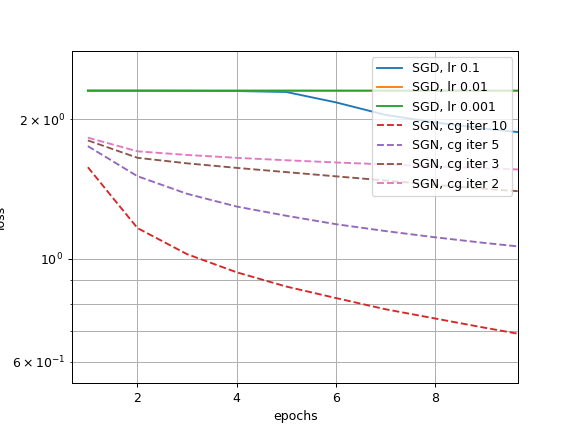

<IPython.core.display.Javascript object>


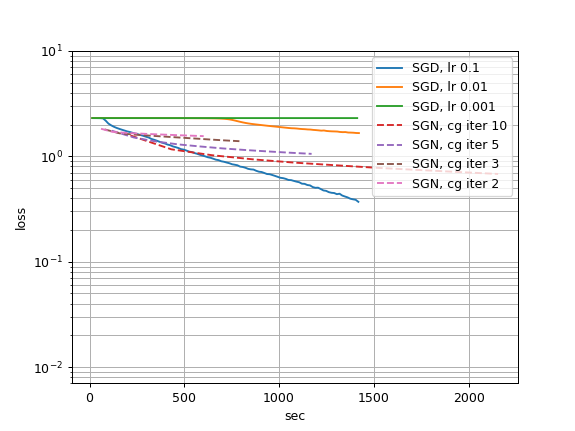

<IPython.core.display.Javascript object>


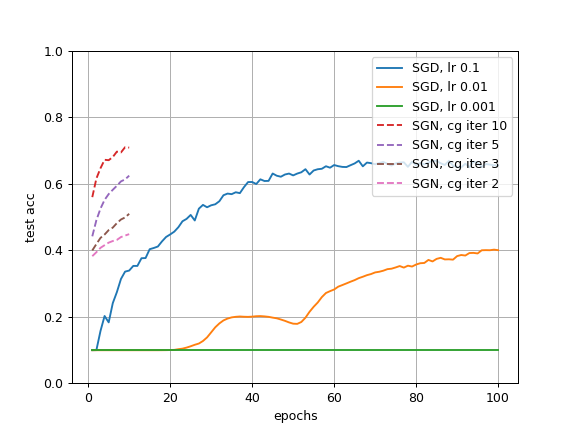

<IPython.core.display.Javascript object>


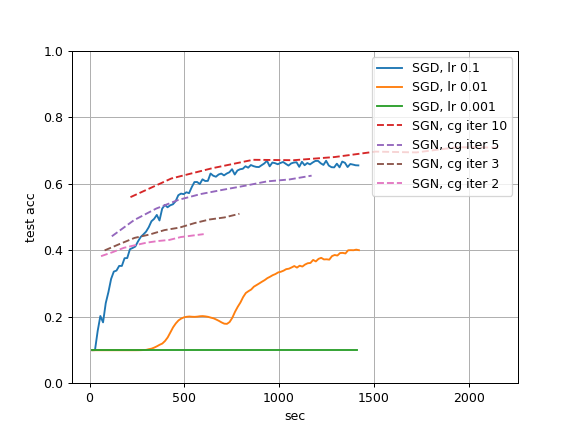

In [49]:
plt.figure(1)
plt.figure(2)
plt.figure(3)
plt.figure(4)

for lr in lr_s:
    #compute min common lenght
    length_sgd = min_length(path, data, lr, n_runs, 'SGD')
    sgd_loss, sgd_time, sgd_testloss = averaged_res(path, data, lr, n_runs, length_sgd, 'SGD')
    sgd_epochs = np.asarray(range(1, len(sgd_loss)+1))
    sgd_time_per_epoch = sgd_epochs*(sgd_time/len(sgd_loss))
    plt.figure(1)
    plt.plot(sgd_epochs, sgd_loss, label='SGD, lr {}'.format(lr))
    plt.figure(2)
    plt.plot(sgd_time_per_epoch, sgd_loss, label='SGD, lr {}'.format(lr))
    plt.figure(3)
    plt.plot(sgd_epochs, sgd_testloss, label='SGD, lr {}'.format(lr))
    plt.figure(4)
    plt.plot(sgd_time_per_epoch, sgd_testloss, label='SGD, lr {}'.format(lr))
    
for cg_iter in cg_iterations:
    #compute min common lenght
    length_sgn = min_length(path, data, cg_iter, n_runs, 'SGN')
    sgn_loss, sgn_time, sgn_testloss = averaged_res(path, data, cg_iter, n_runs, length_sgn, 'SGN')
    sgn_epochs = np.asarray(range(1, len(sgn_loss)+1))
    sgn_time_per_epoch = sgn_epochs*(sgn_time/len(sgn_loss))
    plt.figure(1)
    plt.plot(sgn_epochs, sgn_loss, label='SGN, cg iter {}'.format(cg_iter), linestyle='dashed')
    plt.figure(2)
    plt.plot(sgn_time_per_epoch, sgn_loss, label='SGN, cg iter {}'.format(cg_iter), linestyle='dashed')
    plt.figure(3)
    plt.plot(sgn_epochs, sgn_testloss, label='SGN, cg iter {}'.format(cg_iter), linestyle='dashed')
    plt.figure(4)
    plt.plot(sgn_time_per_epoch, sgn_testloss, label='SGN, cg iter {}'.format(cg_iter), linestyle='dashed')


    
plt.figure(1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend(loc=leg_location)
plt.ylim(y_range)
plt.savefig('{}_loss_epochs.svg'.format(data), format='svg', dpi=1200)


plt.figure(2)
plt.xlabel('sec')
plt.ylabel('loss')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend(loc=leg_location)
plt.ylim(y_range)
plt.savefig('{}_loss_time.svg'.format(data), format='svg', dpi=1200)


plt.figure(3)
plt.xlabel('epochs')
plt.grid(True, which="both", ls="-")
plt.legend(loc=leg_location)
plt.ylim(y_range)
if data in ['boston', 'sine_10', 'sine_100']:
    plt.ylabel('test loss')
    plt.ylim(y_range)
    plt.yscale('log')
    plt.savefig('{}_testloss_epochs.svg'.format(data), format='svg', dpi=1200)
else:
    plt.ylabel('test acc')
    plt.ylim((0,1))
    plt.savefig('{}_testacc_epochs.svg'.format(data), format='svg', dpi=1200)

plt.figure(4)
plt.xlabel('sec')
plt.grid(True, which="both", ls="-")
plt.legend(loc=leg_location)
if data in ['boston', 'sine_10', 'sine_100']:
    plt.ylabel('test loss')
    plt.ylim(y_range)
    plt.yscale('log')
    plt.savefig('{}_testloss_time.svg'.format(data), format='svg', dpi=1200)
else:
    plt.ylabel('test acc')
    plt.ylim((0,1))
    plt.savefig('{}_testacc_time.svg'.format(data), format='svg', dpi=1200)
